# **CS 6120: Natural Language Processing - Prof. Ahmad Uzair** 

### **Assignment 3: n-gram Language Models, Word Sense disambiguation(LSA using SVD), LSTM**

### **Total points: 100**


# Q1. Latent Semantic Analysis (35 Points) 


 - A. Singular Value Decomposition (SVD) based distributed representation of text and documents. You can use python libraries for matrix decomposition (scipy). To demonstrate your work, use the example dataset (Table 2) of "R. A. Harshman (1990). Indexing by latent semantic analysis. Journal of the American society for information science". (10 Points)

 - B. Visualize (2-D) the documents and terms using library of your choice. (10 Points)

 - C. Implement a function that converts a query string to distributed representation and retrieves relevent documents. Visualize the the results as shown in Fig 1 of the paper. (10 Points)

## <CENTER>Task-1 (10 Points)

### Input data

In [4]:
import nltk
#nltk.download()
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = nltk.corpus.stopwords.words('english')
#nltk.download('punkt')
#nltk.download('wordnet')

#Dataset
c1 = 'Computer vision is a field of artificial intelligence that focuses on enabling computers to interpret and understand visual information from the world.'
c2 = 'One of the most prominent applications of computer vision is in autonomous vehicles, where it helps the vehicle "see" and make decisions based on its surroundings.'
c3 = 'Computer vision is also used in facial recognition technology, which has become controversial due to concerns over privacy and potential misuse.'
c4 = 'In the medical field, computer vision is used to assist doctors in diagnosing diseases and analyzing medical images such as x-rays and MRIs.'
c5 = 'Computer vision is also used in security and surveillance systems, where it can detect and recognize suspicious activities or individuals.'
m1 = 'Cybersecurity refers to the practices and technologies used to protect computer systems, networks, and data from unauthorized access, use, disclosure, disruption, modification, or destruction.'
m2 = 'One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.'
m3 = 'Cybersecurity is also essential in protecting critical infrastructure, such as power grids and transportation systems, from cyber attacks that could cause significant disruptions.'
m4 = 'In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.'
documents = [c1, c2, c3, c4, c5, m1, m2, m3, m4]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Perform preprocessing of documents

In the below cell remove punctuations and lowercase the message

In [5]:
import string
string.punctuation # checking punctuations

# TASK CELL

def preprocess(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        preprocessed_message_list: a list of words containing the processed message. 

    '''
    preprocessed_message_list = "".join([char for char in message if char not in string.punctuation]).lower().split(" ")
   

    return preprocessed_message_list

### Verify preprocessed data

In [6]:
for sent in documents:
    print(preprocess(sent))

['computer', 'vision', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'enabling', 'computers', 'to', 'interpret', 'and', 'understand', 'visual', 'information', 'from', 'the', 'world']
['one', 'of', 'the', 'most', 'prominent', 'applications', 'of', 'computer', 'vision', 'is', 'in', 'autonomous', 'vehicles', 'where', 'it', 'helps', 'the', 'vehicle', 'see', 'and', 'make', 'decisions', 'based', 'on', 'its', 'surroundings']
['computer', 'vision', 'is', 'also', 'used', 'in', 'facial', 'recognition', 'technology', 'which', 'has', 'become', 'controversial', 'due', 'to', 'concerns', 'over', 'privacy', 'and', 'potential', 'misuse']
['in', 'the', 'medical', 'field', 'computer', 'vision', 'is', 'used', 'to', 'assist', 'doctors', 'in', 'diagnosing', 'diseases', 'and', 'analyzing', 'medical', 'images', 'such', 'as', 'xrays', 'and', 'mris']
['computer', 'vision', 'is', 'also', 'used', 'in', 'security', 'and', 'surveillance', 'systems', 'where', 'it', 'can', 'detect',

##### Expected Output
```CPP
['computer', 'vision', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'enabling', 'computers', 'to', 'interpret', 'and', 'understand', 'visual', 'information', 'from', 'the', 'world']
['one', 'of', 'the', 'most', 'prominent', 'applications', 'of', 'computer', 'vision', 'is', 'in', 'autonomous', 'vehicles', 'where', 'it', 'helps', 'the', 'vehicle', '"see"', 'and', 'make', 'decisions', 'based', 'on', 'its', 'surroundings']
['computer', 'vision', 'is', 'also', 'used', 'in', 'facial', 'recognition', 'technology', 'which', 'has', 'become', 'controversial', 'due', 'to', 'concerns', 'over', 'privacy', 'and', 'potential', 'misuse']
['in', 'the', 'medical', 'field', 'computer', 'vision', 'is', 'used', 'to', 'assist', 'doctors', 'in', 'diagnosing', 'diseases', 'and', 'analyzing', 'medical', 'images', 'such', 'as', 'x', 'rays', 'and', 'MRIs']
['computer', 'vision', 'is', 'also', 'used', 'in', 'security', 'and', 'surveillance', 'systems', 'where', 'it', 'can', 'detect', 'and', 'recognize', 'suspicious', 'activities', 'or', 'individuals']
['Cybersecurity', 'refers', 'to', 'the', 'practices', 'and', 'technologies', 'used', 'to', 'protect', 'computer', 'systems', 'networks', 'and', 'data', 'from', 'unauthorized', 'access', 'use', 'disclosure', 'disruption', 'modification', 'or', 'destruction']
['one', 'of', 'the', 'most', 'important', 'applications', 'of', 'cybersecurity', 'is', 'in', 'safeguarding', 'sensitive', 'data', 'and', 'personal', 'information', 'such', 'as', 'financial', 'data', 'or', 'healthcare', 'records']
['Cybersecurity', 'is', 'also', 'essential', 'in', 'protecting', 'critical', 'infrastructure', 'such', 'as', 'power', 'grids', 'and', 'transportation', 'systems', 'from', 'cyber', 'attacks', 'that', 'could', 'cause', 'significant', 'disruptions']
['in', 'the', 'healthcare', 'industry', 'cybersecurity', 'is', 'used', 'to', 'protect', 'medical', 'devices', 'and', 'prevent', 'unauthorized', 'access', 'to', 'patient', 'data']
```

### Assign names to document names
In the below cell create a list of document names. It will be later used to visualize documents

In [7]:
def createDocName(documents):
     '''
    Input:
        documents: list of documents.
    Output:
        doc_names: a list of document names. 

    '''
     names = [1] * len(documents)
     vars = re.findall(r'\\n\w\d', str(globals()));
     
     for i in range(0, len(documents)):
          name = vars[i]
          names[i] = name[2:]
          
     return names
     


In [8]:
docName = createDocName(documents)
print(docName)

['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']


##### Expected Output
``` CPP
['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']
```

### Words to Index mapping
Retrieve words from documents and create map of word and associate index to it

In [9]:
def build_word_to_ix(documents, stopwords=None):
     '''
    Input:
        documents: list of documents
        stopwords: list of stopwords
    Output:
        doc_names: map of words and associated index. Make sure to remove words which occur in less than 2 documents 
    '''
     
     documents_zip = zip(documents, range(0,len(documents)))
     word_to_ind = {}
     indices = {}

     for doc, j in documents_zip:
         words = preprocess(doc)
         n = len(words)

         for i in range(0, len(words)):
            if(words[i] in stopwords):
               continue
            
            whereSeen = word_to_ind.get(words[i])
            if(whereSeen == None ):
             word_to_ind[words[i]] = str(j)

            elif(whereSeen[len(whereSeen)-1] != str(j)):

             word_to_ind[words[i]] = "".join([whereSeen, str(j)])

     count = 0
     for key, value in word_to_ind.items():
        if(len(value) >= 2):
           indices[key] = count
           count+=1
        
            
            
    
     return indices
     

In [10]:
word_to_ix = build_word_to_ix(documents, stopword)
print(word_to_ix)

{'computer': 0, 'vision': 1, 'field': 2, 'information': 3, 'one': 4, 'applications': 5, 'also': 6, 'used': 7, 'medical': 8, 'systems': 9, 'cybersecurity': 10, 'protect': 11, 'data': 12, 'unauthorized': 13, 'access': 14, 'healthcare': 15}


##### Expected Output
Note: the index value for each token could be different in your implementation 
```CPP
{'field': 0, 'vision': 1, 'information': 2, 'computer': 3, 'one': 4, 'applications': 5, 'also': 6, 'used': 7, 'medical': 8, 'systems': 9, 'data': 10, 'unauthorized': 11, 'access': 12, 'cybersecurity': 13, 'protect': 14, 'healthcare': 15}
```

### Document-Terms count matrix

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def build_td_matrix(documents, word_to_ix):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
    Output:
        td_matrix: matrix of count of words in documents, each row 
            represent a word and each column represent a document

    '''
    vectorizer = CountVectorizer(vocabulary=word_to_ix);
    td_matrix = vectorizer.fit_transform(documents).toarray()

    return td_matrix

In [39]:
X = build_td_matrix(documents, word_to_ix)
print(X)

(9, 16)


##### Expected Output
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP
[[1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 2. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 2. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]]
 ```

### Singular Value Decomposition
Perform singular value decomposition of count matrix into term singular vector matrix, singular value matrix and document singular vector matrix
- To perform the singular value decompostion please check tutorial:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [13]:
import numpy as np
def svd(documents, word_to_ix, rank):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
        rank: number of colums/rows to retain in decomposed matrix
    Output:
        Uk: term singular vector matrix
        Sk: singular value matrix
        Vk_t: transpose of document singular vector matrix
    '''
    
    Uk, Sk, Vk_t = np.linalg.svd(build_td_matrix(documents, word_to_ix))
    return Uk[:, :rank], Sk[:rank], Vk_t[:, :rank]

In [14]:
Uk, Sk, Vk_t = svd(documents, word_to_ix, 2)
print(Uk)
print(Sk)
print(Vk_t)

[[-0.20485755  0.28230559]
 [-0.2018926   0.18797401]
 [-0.27781813  0.33979025]
 [-0.3848213   0.42056737]
 [-0.32282413  0.34698447]
 [-0.49850192 -0.22485343]
 [-0.3270043  -0.52403905]
 [-0.14631016 -0.03570198]
 [-0.4592868  -0.38181953]]
[4.63682644 3.4660758 ]
[[-0.40776071 -0.30025142]
 [ 0.39028813  0.45516076]
 [ 0.12622415  0.2552902 ]
 [ 0.11067417  0.01081877]
 [ 0.38986849  0.05886294]
 [-0.04176591  0.07983177]
 [-0.07859318  0.12648487]
 [ 0.14063179 -0.28970048]
 [ 0.27558757 -0.25154893]
 [ 0.1776376  -0.33434321]
 [-0.26218017  0.35352935]
 [-0.17369044  0.08702693]
 [ 0.1121266   0.41265184]
 [-0.17369044  0.08702693]
 [-0.17369044  0.08702693]
 [ 0.44069209 -0.18594904]]


##### Expected Output
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP 
[[-0.12717294  0.20278638]
 [-0.30025142  0.45516076]
 [-0.11470385 -0.06974269]
 [-0.40776071  0.39028813]
 [-0.11406442 -0.09695837]
 [-0.11406442 -0.09695837]
 [-0.1610913   0.18784146]
 [-0.41909101  0.14444841]
 [-0.26503675  0.13251736]
 [-0.20868502  0.02493571]
 [-0.34760786 -0.47741341]
 [-0.20656126 -0.17503165]
 [-0.20656126 -0.17503165]
 [-0.3086385  -0.33652293]
 [-0.20656126 -0.17503165]
 [-0.16957527 -0.26134991]]
[[4.63682644 0.        ]
 [0.         3.4660758 ]]
[[-0.20485755  0.28230559]
 [-0.2018926   0.18797401]
 [-0.27781813  0.33979025]
 [-0.3848213   0.42056737]
 [-0.32282413  0.34698447]
 [-0.49850192 -0.22485343]
 [-0.3270043  -0.52403905]
 [-0.14631016 -0.03570198]
 [-0.4592868  -0.38181953]]
 ```

## <CENTER>Task-2 (10 Points)

### Visualize documents in 2D space

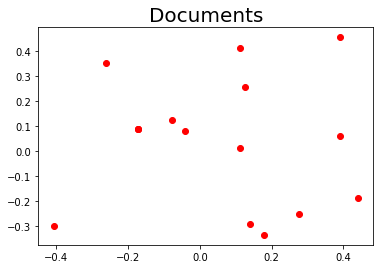

In [15]:
#Visualize documents and print coordinates
import matplotlib.pyplot as plt
import scipy.linalg as la


plt.scatter(Vk_t[:,0], Vk_t[:,1], c='red')
plt.title('Documents', size=20)
plt.show()




##### Expected
```CPP
[[-0.94988891  0.97849257]
 [-0.93614095  0.65153215]
 [-1.28819443  1.17773875]
 [-1.78434956  1.4577184 ]
 [-1.49687945  1.20267446]
 [-2.31146688 -0.77935904]
 [-1.51626218 -1.81635909]
 [-0.67841483 -0.12374577]
 [-2.12963317 -1.32341543]]
```
![image.png](attachment:9df44069-ca33-481c-856c-0ca163d59c10.png)

### Visualize terms in 2D space

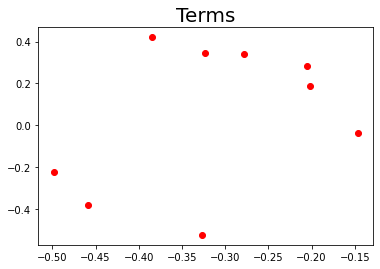

In [16]:
#Visualize terms and print coordinates
plt.scatter(Uk[:,0], Uk[:,1], c='red')
plt.title('Terms', size=20)
plt.show()

##### Expected
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP
[[-0.58967885  0.70287296]
 [-1.3922137   1.57762168]
 [-0.53186185 -0.24173347]
 [-1.89071562  1.35276825]
 [-0.5288969  -0.33606505]
 [-0.5288969  -0.33606505]
 [-0.74695242  0.65107273]
 [-1.94325227  0.50066913]
 [-1.22892939  0.45931522]
 [-0.96763621  0.08642905]
 [-1.61179732 -1.65475107]
 [-0.95778872 -0.60667296]
 [-0.95778872 -0.60667296]
 [-1.43110318 -1.16641399]
 [-0.95778872 -0.60667296]
 [-0.7862911  -0.90585858]]
```
![term.png](attachment:bdb847ce-c276-45a9-a7fe-a89787bbedfa.png)

## <CENTER>Task-3 (10 Points)

### Find matching documents for given document

In [68]:
# Hint create query vector for input document. Calculate its cosine distance from other documents
import scipy.linalg as la
import math


def query(s, Uk, Sk, Vk_t, word_to_ix, documents, min_score=0.9):
    '''
    Input:
        s:query document.
        Uk:Term matrix
        Sk:singular value matrix
        Vk_t:Document matrix
        word_to_ix: {word, index} map
        documents:list of document
        min_score:min score beyond which documents are considerd matching
    Output:
        q_hat: coordinates of query vector
        matches: list of tuples containing matching document and its score
    '''
    #not sure where to get query vec, probably from Vk_t
    # need to return a doc from documents with the cos_dist in matches but how
    matches = []
    
    A = Uk@la.diagsvd(Sk, 2, 16)@Vk_t
    
     

    tokens = s.split()
    words = set(tokens)
    wordVec = [0] * len(A[:,0])

    for doc in documents:
        tokensFromDocs = doc.split()
        tokensFromS = s.split()
        words = set(tokensFromDocs + tokensFromS)
        vec1 = [0] * len(words)
        vec2 = [0] * len(words)

        for i, word in enumerate(words):
            vec1[i] = tokensFromDocs.count(word)
            vec2[i] = tokensFromS.count(word)

        dot_product = sum(vec1[i] * vec2[i] for i in range(len(vec1)))
        mag1 = math.sqrt(sum(vec1[i] ** 2 for i in range(len(vec1))))
        mag2 = math.sqrt(sum(vec2[i] ** 2 for i in range(len(vec2))))
        

        cosine_distance = 1 - (dot_product / (mag1 * mag2))

        if(cosine_distance >= min_score):
            matches.append((doc, cosine_distance))

        q_hat = Vk_t[documents.index(doc)]

          

        







  
    return q_hat, matches

In [69]:
q_hat, matches = query('E-commerce companies use cybersecurity to protect online transactions and prevent fraud.', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)
if matches is not None:
    print(matches)
else:
    print("No matches found")

[ 0.27558757 -0.25154893]
[('One of the most prominent applications of computer vision is in autonomous vehicles, where it helps the vehicle "see" and make decisions based on its surroundings.', 0.9449518117436819), ('Cybersecurity is also essential in protecting critical infrastructure, such as power grids and transportation systems, from cyber attacks that could cause significant disruptions.', 0.9371305386538068)]


##### Expected
```CPP
[-0.51519977 -0.51155458]
[('One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.', 0.9956454663736864), ('In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.', 0.9746106473873951)]
```

### Visual representation of query/document

In [ ]:
# Plot terms, documents and query documents along with lines representing its cosine angle 

##### Expected
![Cosine angle.png](attachment:6f3fc59f-73c5-48ff-930f-9d53a78a5dd5.png)

## **Theory questions: (5 points)**
- A) Give short description of Left-eigen vectors, right-eigen vectors and eigen-values matrix retured by Singular Value Decompostion of document-terms count matrix.

**Answer**: The singular value decomposition of a matrix is the factorization of A into the product of three matrices U, S, and V where the columns of U and V are orthonormal and the matrix D is diagonal with positive real entries.

- B) Visually represent the document "Graph and tree generation" in 2D space along with words and documents as given in previous question.

# Q2. n-Gram Language Models (35 points)

Your task is to train n-gram language models. [Ref SLP Chapter 3]

- Task 1: You will train unigram, bigram, and trigram models on given training files. Then you will score on given test files for unigram, bigram, and trigram. you will generate sentences from the trained model and compute perplexity.
- Task 2: You will create training data for n > 3. and Repeat the above task from training model.
<h6>Part-A = (55 Points) </h6>

In [5]:
'''
Your imports go here
You are encouraged to implement your own functions and not use from library.
'''
import sys
from collections import Counter
import numpy as np

In [6]:
# constants to define pseudo-word tokens
# access via UNK, for instance
# for this assignemnt we will follow <s> tag for beginning of sentence and
# </s> for end of sentence as suggested in SLP Book. Check sample training files for reference.
UNK = "<UNK>"
SENT_BEGIN = "<s>"
SENT_END = "</s>"

We need to initialise global variables for model

In [55]:

"""Initializes Parameters:
  n_gram (int): the n-gram order.
  is_laplace_smoothing (bool): whether or not to use Laplace smoothing
  threshold: words with frequency below threshold will be converted to token
"""
# Initializing different object attributes
n_gram = 2
is_laplace_smoothing = True
vocab = [] 
n_gram_counts = {}
n_minus_1_gram_counts = None
threshold = 1


### Implement training function (10 points)

In [8]:
def make_ngrams(tokens: list, n: int) -> list:
    """Creates n-grams for the given token sequence.
    Args:
    tokens (list): a list of tokens as strings
    n (int): the length of n-grams to create

    Returns:
    list: list of tuples of strings, each tuple being one of the individual n-grams
    """
    n_grams = []

    # Loop through words, creating n-grams
    for i in range((len(tokens)) - n + 1):
        ngram = " ".join(tokens[i:i+n])
        n_grams.append(ngram)

    return n_grams

In [15]:
def train(training_file_path):
    """Trains the language model on the given data. Input file that
    has tokens that are white-space separated, has one sentence per line, and
    that the sentences begin with <s> and end with </s>
    Parameters:
      training_file_path (str): the location of the training data to read

    Returns:
    N Gram Counts, Vocab, N Minus 1 Gram Counts
    """
    with open(training_file_path, 'r') as fh:
      content = fh.read().split() # Read and split data to get list of words
    
    # Get the count of each word
    vocab = set(content)
    n_minus_1_gram_counts = []
    
    # Replace the words with <UNK> if count is < threshold(=1)
    for word in vocab:
       if(content.count(word) < 2):
          word = UNK
    # make use of make_n_grams function
    n_grams = make_ngrams(content, n_gram)
    # Get the training data vocabulary
    # For n>1 grams compute n-1 gram counts to compute probability

    for ngram in n_grams:
      n_gram_counts[ngram] = content.count(ngram) + 1
      n_minus_1_gram_counts.append((content.count(ngram) + 1)/len(n_grams))

    return n_gram_counts, vocab, n_minus_1_gram_counts

Output your Trained Data Parameters:

In [16]:
n_gram_counts, vocab, n_minus_1_gram_counts = train("/content/train.txt")
print(n_gram_counts)
print(vocab)

{'The dragonfly knows': 1, 'dragonfly knows where': 1, 'knows where it': 1, 'where it is': 1, 'it is at': 1, 'is at all': 1, 'at all times': 1, 'all times by': 1, 'times by subtracting': 1, 'by subtracting where': 1, 'subtracting where it': 1, 'where it was': 1, 'it was from': 1, 'was from where': 1, 'from where it': 1, 'it is not': 1, 'is not The': 1, 'not The amount': 1, 'The amount of': 1, 'amount of territorial': 1, 'of territorial disputes': 1, 'territorial disputes in': 1, 'disputes in the': 1, 'in the South': 1, 'the South China': 1, 'South China Sea': 1, 'China Sea will': 1, 'Sea will be': 1, 'will be devastating': 1, 'be devastating for': 1, 'devastating for the': 1, 'for the economy': 1, 'the economy by': 1, 'economy by 2030': 1, 'by 2030 A': 1, '2030 A single': 1, 'A single atom': 1, 'single atom is': 1, 'atom is mostly': 1, 'is mostly empty': 1, 'mostly empty space,': 1, 'empty space, but': 1, 'space, but what': 1, 'but what is': 1, 'what is between': 1, 'is between that': 

### Scoring function (points 5):
Implement Score function that will take input sentence and output probability of given string representing a single sentence.

In [17]:
def score(sentence):
    """Calculates the probability score for a given string representing a single sentence.
    Parameters:
      sentence (str): a sentence with tokens separated by whitespace to calculate the score of
      
    Returns:
      float: the probability value of the given string for this model
    """
    # Split the input sentence and replace out of vocabulary tokens with <UNK>  
    tokens = sentence.split()  
    for word in tokens:
        if word not in vocab:
            word = UNK
    # Calculate probability for each word and multiply(or take log and sum) them to get the sentence probability
    probability  = sum(tokens.count(word)/len(tokens) for word in tokens)
    return probability

In [18]:
with open("train.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

# of test sentences:  8


In [19]:
# print probabilities/score of sentences in test content
for sentence in test_content:
  probablities.append(score(sentence))
probablities = np.array(probablities)
mean = np.mean(probablities)
std_dev = np.std(probablities)

### Sentence generation (10 points)
Generate sentence from the above trained model
- To generate next word from a set of probable n-grams and their probabilities check below tutorial:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [78]:
def generate_sentence():
    """Generates a single sentence from a trained language model using the Shannon technique.
      
    Returns:
      str: the generated sentence
    """
    # Start with <s> and randomly generate words until we encounter sentence end
    n_gram_counts, vocab, n_minus_1_gram_counts = train("train.txt")

    keys = [] 
    for i in n_gram_counts.keys(): 
      keys.append(i)
    
    sentence = []
    counts = []
    prev_word = np.random.choice(len(vocab))
    
    n = n_gram

    # Append sentence begin markers for n>2
    if(n>2):
      sentence.append(prev_word) #or SENT_BEGIN

    # Keep track of previous word for stop condition
    if n > 1:
      while prev_word != SENT_END:
        # Construct the (n-1) gram so far so get a random n minus 1 gram
  
        n_minus_1_gram = np.random.choice(keys, 1)
        print(n_minus_1_gram)
        # Get the counts of all available choices based on n-1 gram
        
        for choice in n_minus_1_gram:
          counts.append(list(n_minus_1_gram).count(choice))
        print(counts)
        # Convert the counts into probability for random.choice() function
        probabilities = [x / len(n_minus_1_gram) for x in counts]
        newWord = np.random.choice(n_minus_1_gram, 1, p=probabilities)
        sentence.append(prev_word)
        # If <s> is generated, ignore and generate another word
        if(newWord == SENT_BEGIN):
          continue
        prev_word = newWord
    else:
      # In case of unigram model, n-1 gram is just the previous word and possible choice is whole vocabulary
      while prev_word != SENT_END:
        # Convert the counts into probability for random.choice() function
        
        for choice in vocab:
          counts.append(list(vocab).count(choice))
       
        probabilities = [x / len(vocab) for x in counts]
        if(len(vocab) != len(probabilities)): break
        newWord = np.random.choice(len(vocab), 1, p=probabilities)
        sentence.append(prev_word)
        # If <s> is generated, ignore and generate another word
        if(newWord == SENT_BEGIN):
          continue
        prev_word = newWord

    # Append sentence end markers for n>2
    sentence.append(SENT_BEGIN)
    
    return sentence

In [39]:
def generate(n):
    """Generates n sentences from a trained language model using the Shannon technique.
    Parameters:
      n (int): the number of sentences to generate
      
    Returns:
      list: a list containing strings, one per generated sentence
    """
    sentences = []
    for i in range(n):
    # Generate sentences one by one and store
      sentences.append(generate_sentence())
      
    return sentences

In [79]:
sentences = generate(50)
print("Sentences:")
for sentence in sentences:
  print(sentence)

['defined many']
[1]
['A single']
[1, 1]


ValueError: ignored

### Evaluate model perplexity (5 points)
Measures the perplexity for the test sequence with your trained model. 
you may assume that this sequence may consist of many sentences "glued together"

The perplexity of the given sequence is the inverse probability of the test set, normalized by the number of words.


In [42]:
# Since this sequence will cross many sentence boundaries, we need to include 
# the begin- and end-sentence markers <s> and </s> in the probability computation. 
# We also need to include the end-of-sentence marker </s> 
# but not the beginning-of-sentence marker <s>) in the total count of word tokens N

def perplexity(test_sequence):
    """.
    Parameters:
      test_sequence (string): a sequence of space-separated tokens to measure the perplexity of

    Returns:
      float: the perplexity of the given sequence
    """ 

    # Replace out of vocab words with <UNK>, already done in score function
    #test_sequence = [token if token in vocab else UNK for token in test_sequence.split()]

    # Get the probability for the sequence
    test_sequence_score = score(test_sequence)
    # Remove sentence begin markers from data for computing N
    count = sum([1 for token in test_sequence if token != "<s>"])

    perplexity = 1/(pow(test_sequence_score, (1/count)))
    

    return perplexity

In [ ]:
print(perplexity(" ".join(sentences[0:10])))

78.4934782125397


### **Explore and explain: (5 points)**
* Experiment n_gram model for n = [1,2,3..7] of your choice. Explain the best choice of n that generates more meaninful sentences.

**ANSWER**: It seemed to me that smaller values of n such as 3, 4, or 5 were good enough for the training data. Higher than that and the model tried to over-extract meaning from sentences and sentence generation became more esoteric.


# Q3. Classification using LSTM - using Tensorflow (30 Points)
In this part, we will be building a bidirectional LSTM network to train and inference sentiment analysis on IMDB dataset.<br>

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time to tweak your hyperparameters.
- Without a GPU, You might have to wait longer to experiment.

In [39]:
!pip install keras.utils
!pip install keras.preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.2 MB/s eta 0:00:00


### Library Imports

In [80]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer





### Visualizing data distribution (1 Point)


In [ ]:
import io
from google.colab import files
uploaded = files.upload()


dataset = pd.read_csv(io.StringIO(uploaded['movie_reviews-2.csv'].decode('utf-8')), sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [10]:
 #######################################################   
 # print head of data frame with help of head function # 
 #######################################################

print(dataset.head())
 


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Petter Mattei's "Love in the Time of Money" is...  positive
4  Probably my all-time favorite movie, a story o...  positive


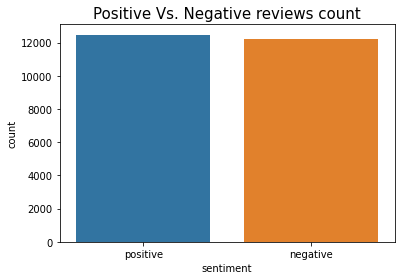

In [11]:
 ####################################################### 
 # plot Positive Vs. Negative reviews count            # 
 #######################################################

sns.countplot(x=dataset['sentiment'])

plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()



### Cleaning the Reviews (2 Points)

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

# From the first assignment
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    text = "   ayy"
    return text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [13]:
 #############################################################################################  
 # Clean all the reviews in the dataset using the clean_text function provided above         # 
 ############################################################################################# 

for review in dataset['review']:
    review = clean_text(review)
 



In [ ]:
 #####################################################################
 # print head of the "CLEANED" data frame with help of head function # 
 #####################################################################

print(dataset.head())
 


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Petter Mattei's "Love in the Time of Money" is...  positive
4  Probably my all-time favorite movie, a story o...  positive


### Splitting the dataset and Encoding Labels (2 Points)

Spliting data: <br> 
80% for the training and the remaining 20% for validation.

Encoding Labels: <br>
Encode labels as negative and positive as 0 and 1 respectively


In [17]:
#################################################################################
# Split the data using the sklearn module                                       #
# 80% for the training and the remaining 20% for validation                     #
#################################################################################

X_train, X_test, y_train, y_test = train_test_split(dataset['review'], dataset['sentiment'], test_size=.2, train_size=.8)



15525    This movie is a quite fair adaptation of the P...
7714     Yeh, I know -- you're quivering with excitemen...
5140     The biggest heroes, is one of the greatest mov...
10544    I first saw this one afternoon in the 80's on ...
20260    I just finished "Dark Chamber" aka "Under Surv...
Name: review, dtype: object


In [15]:
#################################################################################
# Initialize label encoder from sklearn module                                  #
# fit on train labels and transform both train and validation labels            #
#################################################################################
le = LabelEncoder()
le.fit(y_train)

y_transform = le.transform(y_train)
y_transform = le.transform(y_test)




### Pre-Processing The Text (5 Points)
 

In [18]:
# You can use the modules given below
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.preprocessing.text import Tokenizer

###############################################################################  
# Fit your tokenizer on the training reviews                                  #
###############################################################################
tokenizer = Tokenizer()





#################################################################################################
# The word_index dictionary assigns a unique index to each unique word present in the training  #
# reviews.                                                                                      #
#                                                                                               #
# Create the word_index dictionary using the tokenizer                                          #
# Find the vocabulary of your training reviews                                                  #
#################################################################################################

word_index = dict()
word_index = tokenizer.fit_on_texts(X_train)


vocabulary = word_index.keys()


#################################################################################################
# Convert the reviews in the dataset to their index form by using a function available          #
# with the tokenizer                                                                            #
# HINT : convert training and validation reviews into sequences                                 #
#################################################################################################
index_form_train = tokenizer.texts_to_sequences(X_train)
index_form_test = tokenizer.texts_to_sequences(X_test)


#################################################################################################
# Pad the the training and validation sequences so all of them have the same length             # 
# set maxlen = 200                                                                              #
#################################################################################################

X_train = pad_sequences(index_form_train, maxlen=200)
X_test = pad_sequences(index_form_test, maxlen=200)

# maxlen which is the maximum length of one review we will use for our training

print('Vocabulary : {}'.format(vocabulary))

AttributeError: ignored

### Using glove vectors for embedding (5 Points)

GloVe vectors capture both global statistics and local statistics of a corpus. We use GloVe to convert words to embeddings in the vector space based on their semantics. 

We will be using the 200-dimensional GloVe vectors for the task at hand.

To learn more about GloVe please read the following resource:
- https://nlp.stanford.edu/pubs/glove.pdf

In [ ]:
glove_dictionary = {}
with open('glove.6B.200d.txt') as file:
    for each_line in file:
        words_in_line, coeff_cients = each_line.split(maxsplit=1)
        coeff_cients = np.array(coeff_cients.split(),dtype = float)
        glove_dictionary[words_in_line] = coeff_cients

In [ ]:
 # All the words which are not in the GloVe dictionary will be assigned a zero vector.

embedding_matrix = np.zeros((vocabulary, 200))

######################################################################
# The glove_dictionary contains words vs their respective embeddings #
#                                                                    #
# Create the embedding matrix using the glove_dictionary             #
######################################################################

for i, word in enumerate(vocabulary):
    embedding_vector = glove_dictionary[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector



In [ ]:
embedding_matrix.shape

Sample output : (99987, 200)

### Creating The Model (10)

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time.
- Without a GPU, You might have to wait longer to experiment.


Useful resources : <br>
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout <br>





In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

######################################################
# Complete this linear model in tensorflow           #
######################################################

def build_model(embedding_matrix):

  ''' 
  Arguments:
    embedding_matrix : a matrix with the corresponding embeddings
    of all words.

  Returns:
    The LSTM model that you created.
  '''
  
  model = tf.keras.Sequential()

  # TO DO: layer 1 : add embedding layer
  # The embedding layer maps the words to their embedding vectors from the embedding matrix
  model.add(tf.keras.layers.Embedding(vocabulary, 200, weights=[embedding_matrix], input_length=maxlen, trainable=False))



  # TO DO: layer 2 : add Bidirectional LSTM Layer 
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64), input_shape=(maxlen,)))


  # TO DO Add more layers : you can add more dense layers and dropout
  # NOTE : You should be able to achieve an validation accuracy greater than 85%
  #        within 10 epochs
 # layer 2 : add the dense layer with 64 units and relu activation
  model.add(tf.keras.layers.Dense(units=64, activation=tf.nn.relu))

  # layer 3 : add the dropout layer with dropout rate of 0.5
  model.add(tf.keras.layers.Dropout(rate=0.5))
  
  # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
  model.add(tf.keras.layers.Dense(units=32, activation=tf.nn.tanh, kernel_regularizer='l2')) 

  # layer 5 : add the dropout layer with dropout rate of 0.5
  model.add(tf.keras.layers.Dropout(rate=0.5))

  # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
  model.add(tf.keras.layers.Dense(units=16, activation=tf.nn.tanh, kernel_regularizer='l2')) 

  # layer 7 : add the dropout layer with dropout rate of 0.5
  model.add(tf.keras.layers.Dropout(rate=0.5))


  # TO DO Final layer : add output layer and activation 
  model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))


  # TO DO : use a loss function, optimizer as adam to compile 
  # and evaluate model on auc,precision,recall,accuracy
  # HINT : choose your loss function based on the task (binary classification)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

  return model
  

In [ ]:
# NOTE : You should be able to achieve an validation accuracy greater than 85%
#        within 10 epochs

#################################################################
# Call the build_model function and initialize the model        #
#################################################################
model = build_model(X_train)
  

#######################################################################################################
# train and validate the model on the padded sequences of text which we have created initially        #
#######################################################################################################
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve

skf = KFold(n_splits=5)

# Now Split the countvectors and target (y)
split_X = skf.split(X)


# iterate through the train and valid index in splits for 5 folds
for  i, (train_index, test_index) in enumerate(split_X):
  # Get X_train, X_valid, y_train, y_valid using indexes

  X_train, X_valid = X[train_index], X[test_index] 
  y_train, y_valid = y_train.iloc[train_index], y_test.iloc[test_index]
  
  #call the build_model function and initialize the model
  X_train = X_train.toarray()
  X_valid = X_valid.toarray()
  y_train = np.asarray(y_train)
  y_valid = np.asarray(y_valid)

  
  # train and validate the model on the count vectors of text which we have created initially for 5 epochs, 
  # adjust batch size according to your computation power (suggestion use : 16)
  history = model.fit(
    X_train,
    y_train,
    batch_size=15,
    epochs=5,
    validation_data=(X_valid, y_valid)
)

  preds = model.predict(X_valid)

  fig, ax = plt.subplots( figsize=(10,8))

  # plot the graph between training auc and validation auc
  fpr, tpr, threshold = roc_curve(
      y_true=y_valid, y_score = preds)
      
 




### Plotting Accuracy and Losses (5 Points)
 




In [ ]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################

 
plt.plot(fpr, tpr, color='red')
plt.title('Receiver Operating Characteristic Curve', size=20)
plt.plot([0, 1], [0, 1], color='green', linestyle=':')
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.show()



In [ ]:
# You will need to include the pickled model along with the other submission files
# The saved model will be used to verify your lstm's predictions on hidden reviews

##################################################################################
# Save your trained model as a pickle file named "lstm_classifier"               #
# You will be using this saved model to make predictions in the next module      #
##################################################################################

import pickle 

with open("lstm_classifier.pkl", "wb") as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)


### Prediction (5 Points)

In [ ]:
######################################################################
# Load your saved model                                              #
# Use the saved model to make predictions                            #
######################################################################

with open("lstm_classifier.pkl", "rb") as f:
    saved_model = pickle.load(f)



In [ ]:
# use the saved model to predict the reviews
def predict_review(review):
  '''
  Arguments:
    review : A single review for which you want to predict the sentiment for.
             example: "This movie was amazing! I would defenitely watch it again."

  Returns:
    The predicted sentiment for the review : either 1 or 0
  '''


 ############################################################################# 
 # Predict the sentiment for the given review using the model                #
 # that you trained and return the sentiment                                 #
 #                                                                           #
 # HINT : Remember that the review needs to be "preprocessed" before you use #
 # it for prediction                                                         #
 #############################################################################
  review = preprocess(review)
  preds = model.predict(review)

  return preds





In [ ]:
# Do not edit this cell

for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    p = predict_review(review)
    print(f'{review[:100]} -> {p}')
    

### Expected Output:

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1 <br>
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0 <br>
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1 <br>
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0